## Seasonal Chicago, IL Analysis: IQR, Box Plot, Outliers

For detailed information on motivation, questions, objectives and exploration of this notebook, visit the Los Angeles or New York notebook.


## Table of Contents
* [Retrieving and Clean Data](#dataclean)
* [Season Sample Measurement Analysis](#beginseason)
    * [Spring](#springdata)
    * [Summer](#summerdata)
    * [Fall](#falldata)
    * [Winter](#winterdata)


----

In [3]:
%matplotlib inline

In [4]:
# Dependencies and Setup
import matplotlib.cbook as cbook
import matplotlib.dates as dates
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np

import json
import copy
from typing import List
import csv


<a id='dataclean'></a>

Import saved csv. CSV includes data generated from 'StateCountySampleDataDF()' function.
Clean data.

In [5]:
# Import from .CSV
ill_chicago_df = pd.read_csv("./csv_data/illinois_chicago.csv") 

In [6]:
# Verify california is in dataframe
assert ill_chicago_df['state'][0] == 'Illinois'

In [7]:
# Make copy before filtering
illinois_filtered_df = ill_chicago_df.copy()

In [8]:
illinois_filtered_df.head()

,state_code,state,county_code,county,site_number,parameter,sample_measurement,units_of_measure,latitude,longitude,date_local,time_local,date_gmt,time_gmt,method_type,method_code,method,date_of_last_change,cbsa_code
0,17,Illinois,31,Cook,1,Acceptable PM2.5 AQI & Speciation Mass,7.1,Micrograms/cubic meter (LC),41.670992,-87.732457,2019-01-01,00:00,2019-01-01,06:00,Non-FRM,731,Met-One BAM-1020 W/PM2.5 SCC - Beta Attenuation,2019-03-07,16980
1,17,Illinois,31,Cook,1,Acceptable PM2.5 AQI & Speciation Mass,7.9,Micrograms/cubic meter (LC),41.670992,-87.732457,2019-01-01,01:00,2019-01-01,07:00,Non-FRM,731,Met-One BAM-1020 W/PM2.5 SCC - Beta Attenuation,2019-03-07,16980
2,17,Illinois,31,Cook,1,Acceptable PM2.5 AQI & Speciation Mass,10.0,Micrograms/cubic meter (LC),41.670992,-87.732457,2019-01-01,02:00,2019-01-01,08:00,Non-FRM,731,Met-One BAM-1020 W/PM2.5 SCC - Beta Attenuation,2019-03-07,16980
3,17,Illinois,31,Cook,1,Acceptable PM2.5 AQI & Speciation Mass,10.0,Micrograms/cubic meter (LC),41.670992,-87.732457,2019-01-01,03:00,2019-01-01,09:00,Non-FRM,731,Met-One BAM-1020 W/PM2.5 SCC - Beta Attenuation,2019-03-07,16980
4,17,Illinois,31,Cook,1,Acceptable PM2.5 AQI & Speciation Mass,10.2,Micrograms/cubic meter (LC),41.670992,-87.732457,2019-01-01,04:00,2019-01-01,10:00,Non-FRM,731,Met-One BAM-1020 W/PM2.5 SCC - Beta Attenuation,2019-03-07,16980


### Clean dataset.

In [9]:
illinois_filtered_df['sample_measurement'].max()

202.1

In [10]:
# Select certain columns to use for mapping, 
illinois_filtered_df=illinois_filtered_df[['county','site_number','sample_measurement','latitude','longitude','time_local','date_gmt','time_gmt','date_of_last_change']]
# Drop nan values and empty values
illinois_filtered_df=illinois_filtered_df.dropna()
# Remove all numbers below 0 and above 400
illinois_filtered_df=illinois_filtered_df[(illinois_filtered_df[['sample_measurement']] > 0).all(axis=1) & (illinois_filtered_df[['sample_measurement']] < 400).all(axis=1)]

In [11]:
illinois_filtered_noIndexChange = illinois_filtered_df

In [12]:
# Assign date_gmt DateTimeIndex. Allows for date searching throug index.
illinois_filtered_df['date_gmt']=pd.DatetimeIndex(illinois_filtered_df['date_gmt'])
#Set index to date_gmt
illinois_filtered_df = illinois_filtered_df.set_index('date_gmt')

### Clean Copy dataset.

In [13]:
# Copy of clean data
ill_chi_clean_data = illinois_filtered_df.copy()

### Add Column: Add Color to specific sample measurement
Used in scatter plot later.

In [14]:
# Color thresholds
colors_list = []
for row in ill_chi_clean_data['sample_measurement']:
    # if more than a value,
    if row > 55.5:
        # Append color value
        colors_list.append('#e80c0c')
    # else, if more than a value,
    elif row > 35.5:
        # Append color value
        colors_list.append('#e8970c')
    elif row > 12.1:
        # Append color value
        colors_list.append('#dbe36b')
    elif row > 0:
        # Append color value
        colors_list.append('#5cb85c')
    else:
        # Append a failing grade
        colors_list.append('Failed')
        #print(f'failed to apply color on row {row}')
        
# Create a column from the list
ill_chi_clean_data['color'] = colors_list

ill_chi_clean_data['color'].value_counts()

#5cb85c    21050
#dbe36b    10881
#e8970c       69
#e80c0c       16
Name: color, dtype: int64

In [15]:
# Check for Failed values. No Failed values.
assert any(ill_chi_clean_data['color'] == 'Failed') == False

* 41.912739,-87.722673= Cicero, IL (6005)
* 33.79236,-118.17533= Chicago County, IL (76)
* 41.912739,-87.722673= Humboldt Park, IL (57)
* 34.19925,-118.53276= Alsip, IL (1)

<a id='beginseason'></a>

## Begin Season Sample Measurement Analysis
* Spring, Summer, Fall, Winter
    * Scatter Plot
    * IQR Results
    * Box Plots
    * Outliers

<a id='springdata'></a>

### Season: Spring

In [16]:
# Sort by date_gmt and time_gmt
spring_ill_chi = ill_chi_clean_data['2019-03-01':'2019-05-31']

**Reset index for and set new index for box plot.**

In [17]:
spring_ill_chi_box=spring_ill_chi.reset_index().set_index('site_number').sort_values(by=['site_number','time_gmt'], ascending=True)

### Plot: Spring

Input dataframe name below. Make loop later.

In [18]:
# dataframe to plot
plot_df = spring_ill_chi.copy()
#ax.plot(date, site_number_1103.sample_measurement)
plot_y_information = plot_df.sample_measurement

In [19]:
color_threshold = plot_df.color

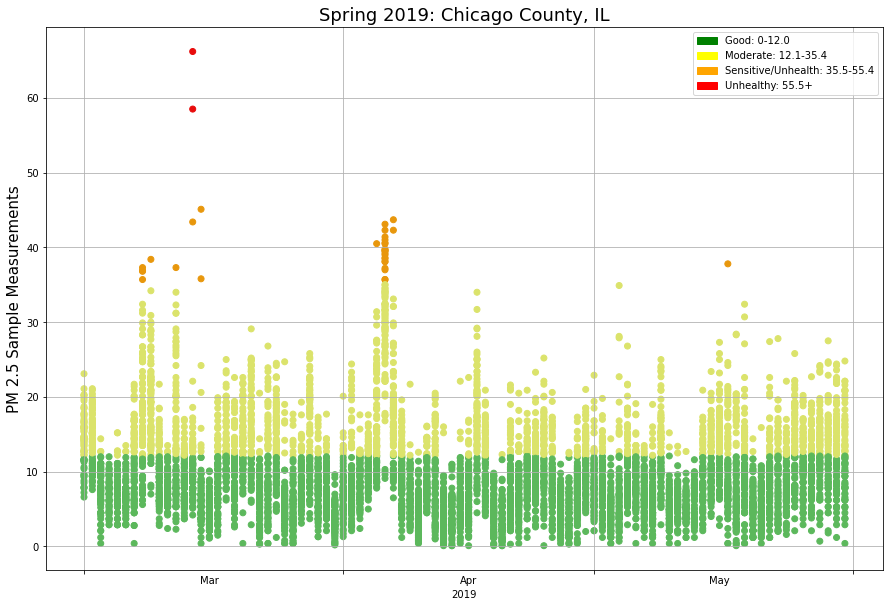

In [20]:
# Assigm date as index of dataframe. Dataframe index has dates
date = plot_df.index.astype('O')

# Data for plt
x = date
y = plot_y_information
c = color_threshold.values


# Plot subplots
fig, ax = plt.subplots(figsize=(15,10))
scatter = ax.scatter(x,y, c=c)

# Set month in xaxis by searching date format
ax.xaxis.set_major_locator(dates.MonthLocator())

# 16 is a slight approximation since months differ in number of days.
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=16))
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))

# loop for custom tickers. Assign marker size and center text
for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')

imid = len(plot_df) // 2
ax.set_xlabel(str(date[imid].year))
ax.set_ylabel('PM 2.5 Sample Measurements', size=15)
ax.set_title('Spring 2019: Chicago County, IL', size=18)
plt.grid(True)

# Labels for legend
green = mpatches.Patch(color='green', label='Good: 0-12.0')
yellow = mpatches.Patch(color='yellow', label='Moderate: 12.1-35.4')
orange = mpatches.Patch(color='orange', label='Sensitive/Unhealth: 35.5-55.4')
red = mpatches.Patch(color='red', label='Unhealthy: 55.5+')
#Call legend
plt.legend(handles = [green,yellow,orange,red])

# Save an image of the chart and print it to the screen
plt.savefig("./Images/IL_spring_pm25_scatter.png")
plt.show()

#### Site Number Seperation: Spring

In [21]:
host_site_num=['6005']

In [22]:
# Seperate by site_number
spring_ill_chi['site_number'].unique()
# Identify Site Number: 1103. Filter out values affiliated
spring_site_number_6005=spring_ill_chi[(spring_ill_chi[['site_number']]==6005).all(axis=1)]
spring_site_number_76=spring_ill_chi[(spring_ill_chi[['site_number']]==76).all(axis=1)]
spring_site_number_57=spring_ill_chi[(spring_ill_chi[['site_number']]==57).all(axis=1)]
spring_site_number_1=spring_ill_chi[(spring_ill_chi[['site_number']]==1).all(axis=1)]


In [23]:
spring_site_number_6005=spring_site_number_6005[['site_number','sample_measurement','time_gmt']].reset_index().set_index('site_number').sort_values(by=['time_gmt'], ascending=True)
spring_site_number_76=spring_site_number_76[['site_number','sample_measurement','time_gmt']].reset_index().set_index('site_number').sort_values(by=['time_gmt'], ascending=True)
spring_site_number_57=spring_site_number_57[['site_number','sample_measurement','time_gmt']].reset_index().set_index('site_number').sort_values(by=['time_gmt'], ascending=True)
spring_site_number_1=spring_site_number_1[['site_number','sample_measurement','time_gmt']].reset_index().set_index('site_number').sort_values(by=['time_gmt'], ascending=True)


In [24]:
# # Make a list of site_numbers. Used in for loops to grab specific data by site number & used for new df header.
filtered_ill_chi_box_list = spring_ill_chi.site_number.sort_values().unique().tolist()

In [25]:
filtered_ill_chi_box_list[3]

6005

#### Begin IQR for Box Plots

In [26]:
# Look through sample measurement list and count the amount of mice in each drug regimen.
# Create an empty list to fill with for loop
measurement_quartile_spring=[]

# Search through filtered_ca_la_box_data with '.loc[site_number, 'sample_measurement' column]' and get the quartile
for i in filtered_ill_chi_box_list:
    location = spring_ill_chi_box.loc[i, 'sample_measurement'].quantile(q=[.25, .5, .75])
    # append results to measurement_quartile list before moving to next value in tumor_regimen_list
    measurement_quartile_spring.append(location)
measurement_quartile_spring

[0.25     5.3
 0.50     8.0
 0.75    12.5
 Name: sample_measurement, dtype: float64,
 0.25     4.5
 0.50     7.0
 0.75    12.7
 Name: sample_measurement, dtype: float64,
 0.25     5.3
 0.50     9.0
 0.75    13.7
 Name: sample_measurement, dtype: float64,
 0.25     6.775
 0.50     9.700
 0.75    13.300
 Name: sample_measurement, dtype: float64]

In [27]:
iqr_all_spring = []

# loop through measurement_quartile range (0-10). Find IQR by selecting one value at a time in the measurement_quartile list. 
for i in range(len(measurement_quartile_spring)):
    iqr = (measurement_quartile_spring[i][0.75])-(measurement_quartile_spring[i][0.25])
    # Append finding to iqr_all list before moving to next value
    iqr_all_spring.append(iqr)
#print(iqr_all_spring)

# Round numbers to 1 number after decimal.
round_iqr_all_spring = [round(num, 2) for num in iqr_all_spring]

In [28]:
# Show list. Verify we have correct amount
# assert len(iqr_all_spring) == 1

In [29]:
round_iqr_all_spring

[7.2, 8.2, 8.4, 6.53]

In [30]:
# Column/Label list
headers_list=['Alsip, IL (1)','Humboldt Park, IL (57)','Chicago County, IL (76)','Cicero, IL (6005)']

# Combine both for loop generated list into one.
measurements_iqr_all_spring = [dict(zip(headers_list, round_iqr_all_spring))]
measurements_iqr_all_spring

[{'Alsip, IL (1)': 7.2,
  'Humboldt Park, IL (57)': 8.2,
  'Chicago County, IL (76)': 8.4,
  'Cicero, IL (6005)': 6.53}]

#### Begin Box Plots

In [31]:
# Values for plotting
box_values_spring = round_iqr_all_spring
# Sort to determine outliers
values_sorted_spring = sorted(box_values_spring)
print(values_sorted_spring)

[6.53, 7.2, 8.2, 8.4]


In [32]:
# Sample measurement values per site location
spring_site_6005_measurements = spring_site_number_6005['sample_measurement']
spring_site_76_measurements = spring_site_number_76['sample_measurement']
spring_site_57_measurements = spring_site_number_57['sample_measurement']
spring_site_1_measurements = spring_site_number_1['sample_measurement']

Number of Samples Measured: 8337


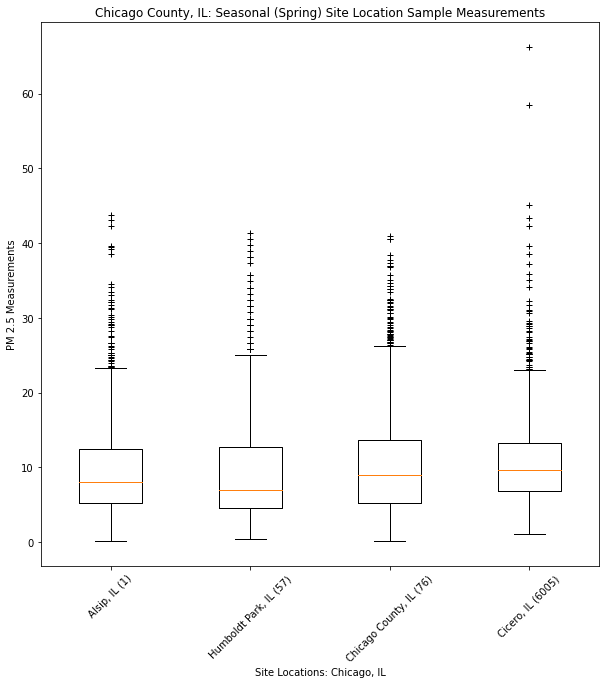

In [33]:
# Generate a box plot of the sample measurement of each site location, annually
measurement_plot_info = [spring_site_1_measurements,spring_site_57_measurements,spring_site_76_measurements,spring_site_6005_measurements]

fig, ax = plt.subplots(figsize=(10, 10))
pos = np.array(range(len(measurement_plot_info))) + 1
bp = ax.boxplot(measurement_plot_info, sym='k+', showfliers=True)

ax.set_xticklabels(headers_list, rotation=45)
ax.set_xlabel('Site Locations: Chicago, IL')
ax.set_ylabel('PM 2.5 Measurements')
ax.set_title('Chicago County, IL: Seasonal (Spring) Site Location Sample Measurements')


plt.savefig("./Images/IL_spring_pm25_BoxPlot.png")
print(f'Number of Samples Measured: {len(spring_ill_chi)}')
plt.show()

#### Potential Outliers
Filtering by outlier values and dates may tell us which day/month of the year has larger than normal air pollution measurements. 

In [34]:
# Alsip, IL (1) Outliers
alsip_spring_outliers = bp["fliers"][3].get_data()[1]
alsip_spring_outliers.sort(axis=-1, kind='quicksort', order=None)
print(f'Total amount samples in set: {len(spring_site_1_measurements)}')
print(f'Total amount of outliers: {len(alsip_spring_outliers)}')
print(f'Alsip Outlier values: {alsip_spring_outliers}')

Total amount samples in set: 2008
Total amount of outliers: 51
Alsip Outlier values: [23.1 23.2 23.4 23.4 23.7 24.2 24.3 24.4 24.4 24.5 24.7 24.7 25.1 25.2
 25.2 25.2 25.3 25.4 25.8 26.  26.1 26.7 26.9 26.9 27.1 27.2 27.4 28.1
 28.2 28.7 28.9 28.9 29.2 29.3 29.6 30.6 30.9 31.1 31.7 32.3 34.1 35.
 35.8 37.2 38.6 39.6 42.3 43.4 45.1 58.5 66.2]


In [35]:
# Humboldt Park, IL (57) Outliers
humboldt_spring_outliers = bp["fliers"][2].get_data()[1]
humboldt_spring_outliers.sort(axis=-1, kind='quicksort', order=None)
print(f'Total amount samples in set: {len(spring_site_57_measurements)}')
print(f'Total amount of outliers: {len(humboldt_spring_outliers)}')
print(f'Humboldt Outlier values: {humboldt_spring_outliers}')

Total amount samples in set: 2141
Total amount of outliers: 59
Humboldt Outlier values: [26.3 26.7 26.7 26.8 26.8 27.1 27.1 27.1 27.2 27.3 27.4 27.5 27.6 27.7
 27.8 27.9 27.9 28.1 28.3 28.3 28.4 28.7 28.8 29.  29.3 29.5 29.8 30.
 30.1 30.7 30.7 31.  31.2 31.2 31.4 31.6 32.  32.1 32.4 32.4 32.4 32.5
 33.4 33.8 33.8 34.2 34.3 34.6 35.  35.7 36.8 36.9 37.  37.3 37.8 38.4
 40.5 40.5 41. ]


In [36]:
# Chicago County, IL (76) Outliers
chi_spring_outliers = bp["fliers"][1].get_data()[1]
chi_spring_outliers.sort(axis=-1, kind='quicksort', order=None)
print(f'Total amount samples in set: {len(spring_site_76_measurements)}')
print(f'Total amount of outliers: {len(chi_spring_outliers)}')
print(f'Chicago Outlier values: {chi_spring_outliers}')

Total amount samples in set: 2008
Total amount of outliers: 43
Chicago Outlier values: [25.8 25.8 25.8 25.8 25.8 25.8 25.8 25.8 25.8 25.8 26.7 26.7 26.7 27.5
 28.3 28.3 29.1 29.1 29.1 29.9 29.9 29.9 29.9 30.8 31.6 31.6 31.6 32.4
 32.4 33.2 34.  34.  34.  34.9 35.7 35.7 37.3 38.1 38.1 39.  39.8 40.6
 41.4]


In [37]:
# Cicero, IL (6005) Outliers
cicero_spring_outliers = bp["fliers"][0].get_data()[1]
cicero_spring_outliers.sort(axis=-1, kind='quicksort', order=None)
print(f'Total amount samples in set: {len(spring_site_6005_measurements)}')
print(f'Total amount of outliers: {len(cicero_spring_outliers)}')
print(f'Cicero Outlier values: {cicero_spring_outliers}')

Total amount samples in set: 2180
Total amount of outliers: 50
Cicero Outlier values: [23.4 23.4 23.6 23.6 23.9 24.2 24.4 24.4 24.6 24.8 25.  25.  25.  25.
 25.3 25.3 25.8 26.1 26.2 26.6 26.7 26.7 27.4 27.6 28.3 28.8 29.1 29.1
 29.2 29.5 29.9 30.1 30.4 31.2 31.3 31.7 32.1 32.1 32.4 33.1 33.5 34.1
 34.5 38.5 39.2 39.5 39.6 42.3 43.1 43.7]


<a id='summerdata'></a>

## Season: Summer

In [38]:
# Sort by date_gmt and time_gmt
summer_ill_chi = ill_chi_clean_data['2019-06-01':'2019-08-31'].sort_values(["date_gmt", "time_gmt"])

**Reset index for and set new index for box plot.**

In [39]:
summer_ill_chi_box=summer_ill_chi.reset_index().set_index('site_number').sort_values(by=['site_number','time_gmt'], ascending=True)

### Plot: Summer

Input dataframe name below. Make loop later.

In [40]:
# dataframe to plot
plot_df = summer_ill_chi.copy()
#ax.plot(date, site_number_1103.sample_measurement)
plot_y_information = plot_df.sample_measurement

In [41]:
color_threshold = plot_df.color

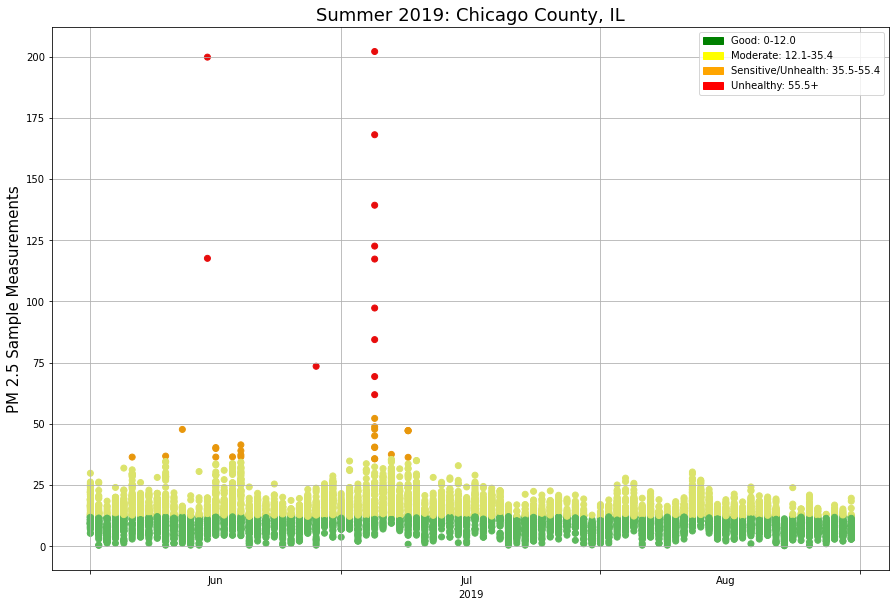

In [42]:
# Assigm date as index of dataframe. Dataframe index has dates
date = plot_df.index.astype('O')

# Data for plt
x = date
y = plot_y_information
c = color_threshold.values


# Plot subplots
fig, ax = plt.subplots(figsize=(15,10))
scatter = ax.scatter(x,y, c=c)

# Set month in xaxis by searching date format
ax.xaxis.set_major_locator(dates.MonthLocator())

# 16 is a slight approximation since months differ in number of days.
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=16))
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))

# loop for custom tickers. Assign marker size and center text
for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')

imid = len(plot_df) // 2
ax.set_xlabel(str(date[imid].year))
ax.set_ylabel('PM 2.5 Sample Measurements', size=15)
ax.set_title('Summer 2019: Chicago County, IL', size=18)
plt.grid(True)

# Labels for legend
green = mpatches.Patch(color='green', label='Good: 0-12.0')
yellow = mpatches.Patch(color='yellow', label='Moderate: 12.1-35.4')
orange = mpatches.Patch(color='orange', label='Sensitive/Unhealth: 35.5-55.4')
red = mpatches.Patch(color='red', label='Unhealthy: 55.5+')
#Call legend
plt.legend(handles = [green,yellow,orange,red])

# Save an image of the chart and print it to the screen
plt.savefig("./Images/IL_summer_pm25_scatter.png")
plt.show()

In [43]:
# Seperate by site_number
summer_ill_chi['site_number'].unique()
# Identify Site Number: 1103. Filter out values affiliated
summer_site_number_6005=summer_ill_chi[(summer_ill_chi[['site_number']]==6005).all(axis=1)]
summer_site_number_76=summer_ill_chi[(summer_ill_chi[['site_number']]==76).all(axis=1)]
summer_site_number_57=summer_ill_chi[(summer_ill_chi[['site_number']]==57).all(axis=1)]
summer_site_number_1=summer_ill_chi[(summer_ill_chi[['site_number']]==1).all(axis=1)]

In [44]:
summer_site_number_6005=summer_site_number_6005[['site_number','sample_measurement','time_gmt']].reset_index().set_index('site_number').sort_values(by=['time_gmt'], ascending=True)
summer_site_number_76=summer_site_number_76[['site_number','sample_measurement','time_gmt']].reset_index().set_index('site_number').sort_values(by=['time_gmt'], ascending=True)
summer_site_number_57=summer_site_number_57[['site_number','sample_measurement','time_gmt']].reset_index().set_index('site_number').sort_values(by=['time_gmt'], ascending=True)
summer_site_number_1=summer_site_number_1[['site_number','sample_measurement','time_gmt']].reset_index().set_index('site_number').sort_values(by=['time_gmt'], ascending=True)


In [45]:
# Make a list of site_numbers. Used in for loops to grab specific data by site number & used for new df header.
filtered_ill_chi_box_list = summer_ill_chi.site_number.sort_values().unique().tolist()
filtered_ill_chi_box_list

[1, 57, 76, 6005]

#### Begin IQR for Box Plots

In [46]:
# Look through sample measurement list and count the amount of mice in each drug regimen.
# Create an empty list to fill with for loop
measurement_quartile_summer=[]

# Search through filtered_ca_la_box_data with '.loc[site_number, 'sample_measurement' column]' and get the quartile
for i in filtered_ill_chi_box_list:
    location = summer_ill_chi_box.loc[i, 'sample_measurement'].quantile(q=[.25, .5, .75])
    # append results to measurement_quartile list before moving to next value in tumor_regimen_list
    measurement_quartile_summer.append(location)
measurement_quartile_summer

[0.25     9.7
 0.50    12.4
 0.75    15.9
 Name: sample_measurement, dtype: float64,
 0.25     6.2
 0.50     8.6
 0.75    12.7
 Name: sample_measurement, dtype: float64,
 0.25     8.5
 0.50    11.9
 0.75    16.5
 Name: sample_measurement, dtype: float64,
 0.25     8.7
 0.50    11.8
 0.75    15.2
 Name: sample_measurement, dtype: float64]

In [47]:
iqr_all_summer = []

# loop through measurement_quartile range (0-10). Find IQR by selecting one value at a time in the measurement_quartile list. 
for i in range(len(measurement_quartile_summer)):
    iqr = (measurement_quartile_summer[i][0.75])-(measurement_quartile_summer[i][0.25])
    # Append finding to iqr_all list before moving to next value
    iqr_all_summer.append(iqr)
#print(iqr_all_summer)

# Round numbers to 1 number after decimal.
round_iqr_all_summer = [round(num, 2) for num in iqr_all_summer]

In [48]:
# Show list. Verify we have correct amount
assert len(iqr_all_summer) == 4

In [49]:
# Combine both for loop generated list into one.
measurements_iqr_all_summer = [dict(zip(headers_list, round_iqr_all_summer))]
measurements_iqr_all_summer

[{'Alsip, IL (1)': 6.2,
  'Humboldt Park, IL (57)': 6.5,
  'Chicago County, IL (76)': 8.0,
  'Cicero, IL (6005)': 6.5}]

#### Begin Box Plots

In [50]:
# Values for plotting
box_values_summer = round_iqr_all_summer
# Sort to determine outliers
values_sorted_summer = sorted(box_values_summer)
print(values_sorted_summer)

[6.2, 6.5, 6.5, 8.0]


In [51]:
# Sample measurement values per site location
summer_site_6005_measurements = summer_site_number_6005['sample_measurement']
summer_site_76_measurements = summer_site_number_76['sample_measurement']
summer_site_57_measurements = summer_site_number_57['sample_measurement']
summer_site_1_measurements = summer_site_number_1['sample_measurement']

Number of Samples Measured: 8376


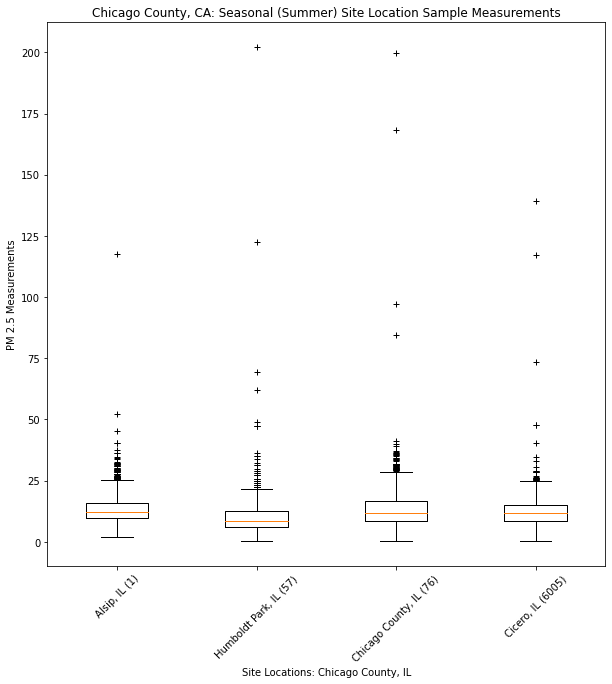

In [52]:
# Generate a box plot of the sample measurement of each site location, annually
measurement_plot_info = [summer_site_1_measurements,summer_site_57_measurements,summer_site_76_measurements,summer_site_6005_measurements]

fig, ax = plt.subplots(figsize=(10, 10))
pos = np.array(range(len(measurement_plot_info))) + 1
bp = ax.boxplot(measurement_plot_info, sym='k+', showfliers=True)

ax.set_xticklabels(headers_list, rotation=45)
ax.set_xlabel('Site Locations: Chicago County, IL')
ax.set_ylabel('PM 2.5 Measurements')
ax.set_title('Chicago County, CA: Seasonal (Summer) Site Location Sample Measurements')

plt.savefig("./Images/IL_summer_pm25_BoxPlot.png")
print(f'Number of Samples Measured: {len(summer_ill_chi)}')
plt.show()

#### Potential Outliers
Filtering by outlier values and dates may tell us which day/month of the year has larger than normal air pollution measurements. 

In [53]:
# Alsip, IL (1) Outliers
alsip_summer_outliers = bp["fliers"][3].get_data()[1]
alsip_summer_outliers.sort(axis=-1, kind='quicksort', order=None)
print(f'Total amount samples in set: {len(summer_site_1_measurements)}')
print(f'Total amount of outliers: {len(alsip_summer_outliers)}')
print(f'Alsip Outlier values: {alsip_summer_outliers}')

Total amount samples in set: 2018
Total amount of outliers: 29
Alsip Outlier values: [ 25.   25.   25.1  25.4  25.4  25.5  25.7  25.7  25.8  26.   26.1  26.1
  26.1  26.4  26.9  28.6  28.7  28.7  28.8  29.   30.5  32.9  34.8  40.3
  47.7  47.8  73.5 117.3 139.3]


In [54]:
# Humboldt Park, IL (57) Outliers
humboldt_summer_outliers = bp["fliers"][2].get_data()[1]
humboldt_summer_outliers.sort(axis=-1, kind='quicksort', order=None)
print(f'Total amount samples in set: {len(summer_site_57_measurements)}')
print(f'Total amount of outliers: {len(humboldt_summer_outliers)}')
print(f'Humboldt Outlier values: {humboldt_summer_outliers}')

Total amount samples in set: 2172
Total amount of outliers: 53
Humboldt Outlier values: [ 28.7  29.   29.2  29.3  29.4  29.5  29.6  29.6  29.7  29.8  29.8  30.
  30.1  30.2  30.3  30.4  30.5  30.5  30.8  30.8  31.   31.3  31.3  31.4
  31.5  31.7  31.8  31.9  31.9  31.9  33.2  33.6  33.6  33.7  33.7  34.3
  34.4  35.   35.4  35.4  35.7  35.7  36.4  36.5  36.8  37.3  39.   39.9
  41.4  84.4  97.3 168.1 199.8]


In [55]:
# Chicago County, IL (76) Outliers
chi_summer_outliers = bp["fliers"][1].get_data()[1]
chi_summer_outliers.sort(axis=-1, kind='quicksort', order=None)
print(f'Total amount samples in set: {len(summer_site_76_measurements)}')
print(f'Total amount of outliers: {len(chi_summer_outliers)}')
print(f'Chicago Outlier values: {chi_summer_outliers}')

Total amount samples in set: 2095
Total amount of outliers: 50
Chicago Outlier values: [ 22.6  22.6  22.6  22.6  22.6  22.6  22.6  22.6  22.6  22.6  22.6  22.6
  22.6  23.4  23.4  23.4  23.4  24.2  24.2  24.2  25.   25.   25.   25.
  25.8  25.8  25.8  27.5  27.5  27.5  28.3  28.3  29.1  29.1  29.9  31.6
  31.6  32.4  34.   34.9  34.9  36.5  47.2  47.2  47.2  48.8  61.9  69.3
 122.6 202.1]


In [56]:
# Cicero, IL (6005) Outliers
cicero_summer_outliers = bp["fliers"][0].get_data()[1]
cicero_summer_outliers.sort(axis=-1, kind='quicksort', order=None)
print(f'Total amount samples in set: {len(summer_site_6005_measurements)}')
print(f'Total amount of outliers: {len(cicero_summer_outliers)}')
print(f'Cicero Outlier values: {cicero_summer_outliers}')

Total amount samples in set: 2091
Total amount of outliers: 68
Cicero Outlier values: [ 25.3  25.3  25.3  25.5  25.6  25.8  25.8  25.9  26.1  26.2  26.2  26.2
  26.3  26.4  26.4  26.6  26.6  26.6  27.   27.   27.1  27.1  27.4  27.6
  27.6  27.6  27.8  27.8  27.8  27.9  28.4  28.5  28.7  28.9  29.   29.
  29.3  29.4  29.5  29.5  29.6  29.7  29.8  30.   30.3  30.8  30.9  31.1
  31.2  31.6  31.7  31.9  32.   32.3  32.4  32.4  32.5  33.7  34.3  34.6
  36.3  36.4  37.5  40.3  40.5  45.1  52.2 117.6]


<a id='falldata'></a>

## Season: Fall

In [57]:
# Sort by date_gmt and time_gmt
fall_ill_chi = ill_chi_clean_data['2019-09-01':'2019-11-30'].sort_values(["date_gmt", "time_gmt"])

**Reset index for and set new index for box plot.**

In [58]:
fall_ill_chi_box=fall_ill_chi.reset_index().set_index('site_number').sort_values(by=['site_number','time_gmt'], ascending=True)

### Plot: Fall

Input dataframe name below. Make loop later.

In [59]:
# dataframe to plot
plot_df = fall_ill_chi.copy()
#ax.plot(date, site_number_1103.sample_measurement)
plot_y_information = plot_df.sample_measurement

In [60]:
color_threshold = plot_df.color

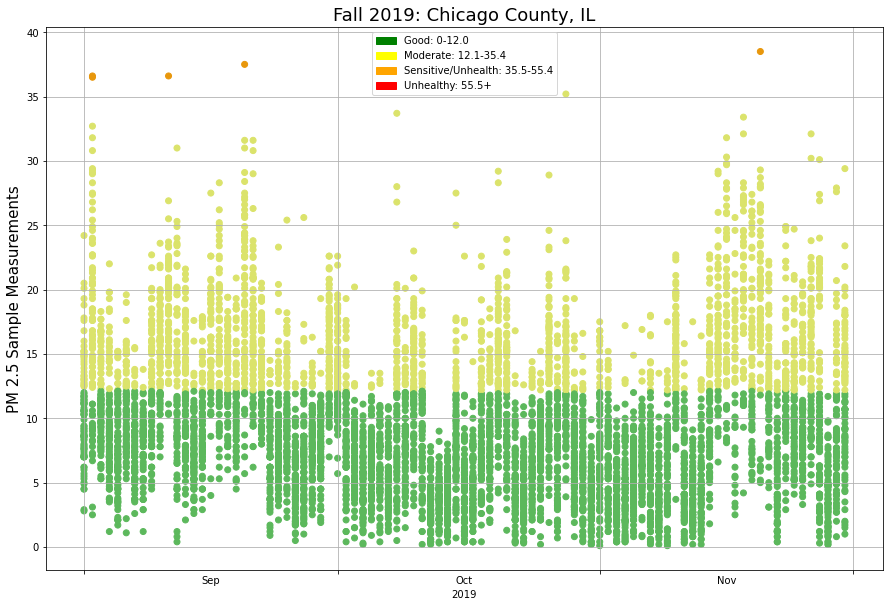

In [61]:
# Assigm date as index of dataframe. Dataframe index has dates
date = plot_df.index.astype('O')

# Data for plt
x = date
y = plot_y_information
c = color_threshold.values


# Plot subplots
fig, ax = plt.subplots(figsize=(15,10))
scatter = ax.scatter(x,y, c=c)

# Set month in xaxis by searching date format
ax.xaxis.set_major_locator(dates.MonthLocator())

# 16 is a slight approximation since months differ in number of days.
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=16))
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))

# loop for custom tickers. Assign marker size and center text
for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')

imid = len(plot_df) // 2
ax.set_xlabel(str(date[imid].year))
ax.set_ylabel('PM 2.5 Sample Measurements', size=15)
ax.set_title('Fall 2019: Chicago County, IL', size=18)
plt.grid(True)

# Labels for legend
green = mpatches.Patch(color='green', label='Good: 0-12.0')
yellow = mpatches.Patch(color='yellow', label='Moderate: 12.1-35.4')
orange = mpatches.Patch(color='orange', label='Sensitive/Unhealth: 35.5-55.4')
red = mpatches.Patch(color='red', label='Unhealthy: 55.5+')
#Call legend
plt.legend(handles = [green,yellow,orange,red])

# Save an image of the chart and print it to the screen
plt.savefig("./Images/IL_fall_pm25_scatter.png")
plt.show()

#### Site Number Seperation: Fall

In [62]:
# Seperate by site_number
fall_ill_chi['site_number'].unique()
# Identify Site Number: 1103. Filter out values affiliated
fall_site_number_6005=fall_ill_chi[(fall_ill_chi[['site_number']]==6005).all(axis=1)]
fall_site_number_76=fall_ill_chi[(fall_ill_chi[['site_number']]==76).all(axis=1)]
fall_site_number_57=fall_ill_chi[(fall_ill_chi[['site_number']]==57).all(axis=1)]
fall_site_number_1=fall_ill_chi[(fall_ill_chi[['site_number']]==1).all(axis=1)]

In [63]:
fall_site_number_6005=fall_site_number_6005[['site_number','sample_measurement','time_gmt']].reset_index().set_index('site_number').sort_values(by=['time_gmt'], ascending=True)
fall_site_number_76=fall_site_number_76[['site_number','sample_measurement','time_gmt']].reset_index().set_index('site_number').sort_values(by=['time_gmt'], ascending=True)
fall_site_number_57=fall_site_number_57[['site_number','sample_measurement','time_gmt']].reset_index().set_index('site_number').sort_values(by=['time_gmt'], ascending=True)
fall_site_number_1=fall_site_number_1[['site_number','sample_measurement','time_gmt']].reset_index().set_index('site_number').sort_values(by=['time_gmt'], ascending=True)

In [64]:
# Make a list of site_numbers. Used in for loops to grab specific data by site number & used for new df header.
filtered_ill_chi_box_list = fall_ill_chi.site_number.sort_values().unique().tolist()
filtered_ill_chi_box_list

[1, 57, 76, 6005]

#### Begin IQR for Box Plots

In [65]:
# Look through sample measurement list and count the amount of mice in each drug regimen.
# Create an empty list to fill with for loop
measurement_quartile_fall=[]

# Search through filtered_ca_la_box_data with '.loc[site_number, 'sample_measurement' column]' and get the quartile
for i in filtered_ill_chi_box_list:
    location = fall_ill_chi_box.loc[i, 'sample_measurement'].quantile(q=[.25, .5, .75])
    # append results to measurement_quartile list before moving to next value in tumor_regimen_list
    measurement_quartile_fall.append(location)
measurement_quartile_fall

[0.25     5.4
 0.50     8.2
 0.75    11.9
 Name: sample_measurement, dtype: float64,
 0.25     5.3
 0.50     7.8
 0.75    12.7
 Name: sample_measurement, dtype: float64,
 0.25     4.100
 0.50     7.700
 0.75    11.725
 Name: sample_measurement, dtype: float64,
 0.25     6.8
 0.50    10.6
 0.75    15.4
 Name: sample_measurement, dtype: float64]

In [66]:
iqr_all_fall = []

# loop through measurement_quartile range (0-10). Find IQR by selecting one value at a time in the measurement_quartile list. 
for i in range(len(measurement_quartile_fall)):
    iqr = (measurement_quartile_fall[i][0.75])-(measurement_quartile_fall[i][0.25])
    # Append finding to iqr_all list before moving to next value
    iqr_all_fall.append(iqr)
#print(iqr_all_spring)

# Round numbers to 1 number after decimal.
round_iqr_all_fall = [round(num, 2) for num in iqr_all_fall]

In [67]:
# Show list. Verify we have correct amount
assert len(iqr_all_fall) >= 4

In [68]:
# Combine both for loop generated list into one.
measurements_iqr_all_fall = [dict(zip(headers_list, round_iqr_all_fall))]
measurements_iqr_all_fall

[{'Alsip, IL (1)': 6.5,
  'Humboldt Park, IL (57)': 7.4,
  'Chicago County, IL (76)': 7.62,
  'Cicero, IL (6005)': 8.6}]

#### Begin Box Plots

In [69]:
# Values for plotting
box_values_fall = round_iqr_all_fall
# Sort to determine outliers
values_sorted_fall = sorted(box_values_fall)
print(values_sorted_fall)

[6.5, 7.4, 7.62, 8.6]


In [70]:
# Sample measurement values per site location
fall_site_6005_measurements = fall_site_number_6005['sample_measurement']
fall_site_76_measurements = fall_site_number_76['sample_measurement']
fall_site_57_measurements = fall_site_number_57['sample_measurement']
fall_site_1_measurements = fall_site_number_1['sample_measurement']

Number of Samples Measured: 8002


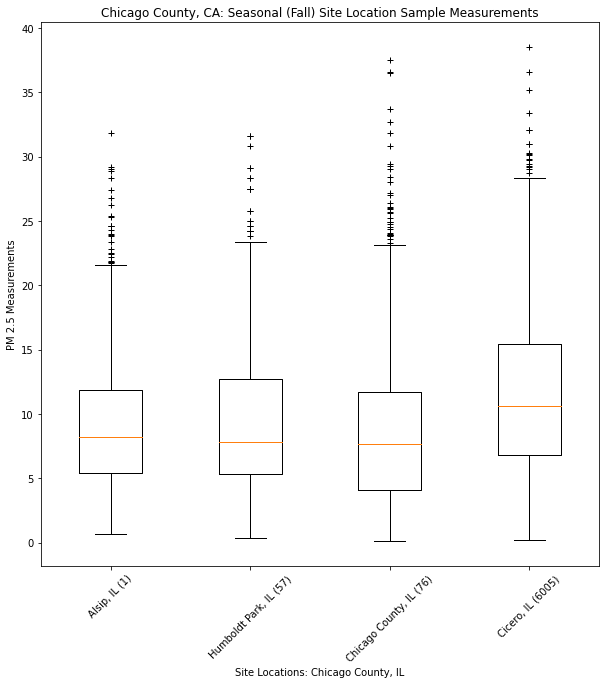

In [71]:
# Generate a box plot of the sample measurement of each site location, annually
measurement_plot_info = [fall_site_1_measurements,fall_site_57_measurements,fall_site_76_measurements,fall_site_6005_measurements]

fig, ax = plt.subplots(figsize=(10, 10))
pos = np.array(range(len(measurement_plot_info))) + 1
bp = ax.boxplot(measurement_plot_info, sym='k+', showfliers=True)

ax.set_xticklabels(headers_list, rotation=45)
ax.set_xlabel('Site Locations: Chicago County, IL')
ax.set_ylabel('PM 2.5 Measurements')
ax.set_title('Chicago County, CA: Seasonal (Fall) Site Location Sample Measurements')

plt.savefig("./Images/IL_fall_pm25_BoxPlot.png")
print(f'Number of Samples Measured: {len(fall_ill_chi)}')
plt.show()

#### Potential Outliers
Filtering by outlier values and dates may tell us which day/month of the year has larger than normal air pollution measurements. 

In [72]:
# Alsip, IL (1) Outliers
alsip_fall_outliers = bp["fliers"][3].get_data()[1]
alsip_fall_outliers.sort(axis=-1, kind='quicksort', order=None)
print(f'Total amount samples in set: {len(fall_site_1_measurements)}')
print(f'Total amount of outliers: {len(alsip_fall_outliers)}')
print(f'Alsip Outlier values: {alsip_fall_outliers}')

Total amount samples in set: 1805
Total amount of outliers: 18
Alsip Outlier values: [28.7 29.  29.2 29.3 29.4 29.7 29.8 30.1 30.2 30.3 31.  31.  32.1 32.1
 33.4 35.2 36.6 38.5]


In [73]:
# Humboldt Park, IL (57) Outliers
humboldt_fall_outliers = bp["fliers"][2].get_data()[1]
humboldt_fall_outliers.sort(axis=-1, kind='quicksort', order=None)
print(f'Total amount samples in set: {len(fall_site_57_measurements)}')
print(f'Total amount of outliers: {len(humboldt_fall_outliers)}')
print(f'Humboldt Outlier values: {humboldt_fall_outliers}')

Total amount samples in set: 1993
Total amount of outliers: 35
Humboldt Outlier values: [23.3 23.6 23.8 23.9 23.9 23.9 23.9 24.  24.1 24.4 24.5 24.8 24.9 24.9
 25.2 25.6 25.7 25.9 26.  26.1 26.4 27.  27.2 28.  28.4 29.  29.3 29.4
 30.8 31.8 32.7 33.7 36.5 36.6 37.5]


In [74]:
# Chicago County, IL (76) Outliers
chi_fall_outliers = bp["fliers"][1].get_data()[1]
chi_fall_outliers.sort(axis=-1, kind='quicksort', order=None)
print(f'Total amount samples in set: {len(fall_site_76_measurements)}')
print(f'Total amount of outliers: {len(chi_fall_outliers)}')
print(f'Chicago Outlier values: {chi_fall_outliers}')

Total amount samples in set: 2032
Total amount of outliers: 22
Chicago Outlier values: [23.8 24.2 24.2 24.2 24.2 24.6 24.6 25.  25.  25.8 25.8 27.5 27.5 27.5
 27.5 28.3 28.3 29.1 29.1 30.8 31.6 31.6]


In [75]:
# Cicero, IL (6005) Outliers
cicero_fall_outliers = bp["fliers"][0].get_data()[1]
cicero_fall_outliers.sort(axis=-1, kind='quicksort', order=None)
print(f'Total amount samples in set: {len(fall_site_6005_measurements)}')
print(f'Total amount of outliers: {len(cicero_fall_outliers)}')
print(f'Cicero Outlier values: {cicero_fall_outliers}')

Total amount samples in set: 2172
Total amount of outliers: 26
Cicero Outlier values: [21.7 21.8 21.8 21.9 22.2 22.4 22.5 22.8 23.4 23.8 23.9 24.  24.3 24.6
 24.6 24.6 25.3 25.4 26.2 26.8 27.4 28.3 28.9 29.  29.2 31.8]


<a id='winterdata'></a>

## Season: Winter

In [76]:
# Beginning of the year Winter
# Sort by date_gmt and time_gmt
winter_ill_chi = ill_chi_clean_data['2019-01-01':'2019-02'].sort_values(["date_gmt", "time_gmt"])
winter_ill_chi

,county,site_number,sample_measurement,latitude,longitude,time_local,time_gmt,date_of_last_change,color
date_gmt,,,,,,,,,
2019-01-01,Cook,1,7.1,41.670992,-87.732457,00:00,06:00,2019-03-07,#5cb85c
2019-01-01,Cook,57,3.4,41.912739,-87.722673,00:00,06:00,2019-03-07,#5cb85c
2019-01-01,Cook,76,10.3,41.751400,-87.713488,00:00,06:00,2019-03-07,#5cb85c
2019-01-01,Cook,6005,6.2,41.864426,-87.748902,00:00,06:00,2019-03-07,#5cb85c
2019-01-01,Cook,1,7.9,41.670992,-87.732457,01:00,07:00,2019-03-07,#5cb85c
...,...,...,...,...,...,...,...,...,...
2019-02-28,Cook,76,22.4,41.751400,-87.713488,16:00,22:00,2019-04-09,#dbe36b
2019-02-28,Cook,6005,16.2,41.864426,-87.748902,16:00,22:00,2019-04-09,#dbe36b
2019-02-28,Cook,1,15.4,41.670992,-87.732457,17:00,23:00,2019-04-09,#dbe36b


**Reset index for and set new index for box plot.**

In [77]:
winter_ill_chi_box=winter_ill_chi.reset_index().set_index('site_number').sort_values(by=['site_number','time_gmt'], ascending=True)

### Plot: Winter

Input dataframe name below. Make loop later.

In [78]:
# dataframe to plot
plot_df = winter_ill_chi.copy()
#ax.plot(date, site_number_1103.sample_measurement)
plot_y_information = plot_df.sample_measurement

In [79]:
color_threshold = plot_df.color

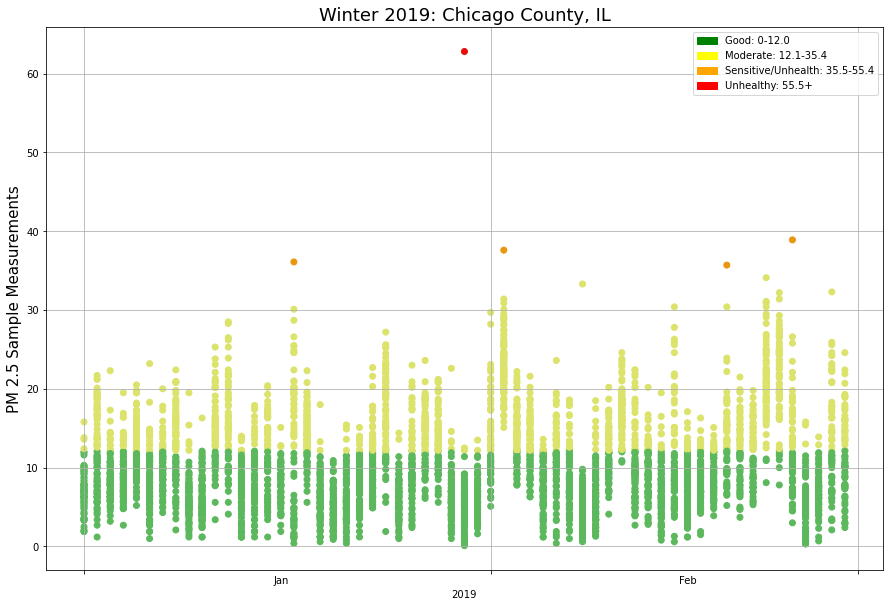

In [80]:
# Assigm date as index of dataframe. Dataframe index has dates
date = plot_df.index.astype('O')

# Data for plt
x = date
y = plot_y_information
c = color_threshold.values


# Plot subplots
fig, ax = plt.subplots(figsize=(15,10))
scatter = ax.scatter(x,y, c=c)

# Set month in xaxis by searching date format
ax.xaxis.set_major_locator(dates.MonthLocator())

# 16 is a slight approximation since months differ in number of days.
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=16))
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))

# loop for custom tickers. Assign marker size and center text
for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')

imid = len(plot_df) // 2
ax.set_xlabel(str(date[imid].year))
ax.set_ylabel('PM 2.5 Sample Measurements', size=15)
ax.set_title('Winter 2019: Chicago County, IL', size=18)
plt.grid(True)

# Labels for legend
green = mpatches.Patch(color='green', label='Good: 0-12.0')
yellow = mpatches.Patch(color='yellow', label='Moderate: 12.1-35.4')
orange = mpatches.Patch(color='orange', label='Sensitive/Unhealth: 35.5-55.4')
red = mpatches.Patch(color='red', label='Unhealthy: 55.5+')
#Call legend
plt.legend(handles = [green,yellow,orange,red])

# Save an image of the chart and print it to the screen
plt.savefig("./Images/IL_winter_pm25_scatter.png")
plt.show()

In [81]:
# Seperate by site_number
winter_ill_chi['site_number'].unique()
# Identify Site Number: 1103. Filter out values affiliated
winter_site_number_6005=winter_ill_chi[(winter_ill_chi[['site_number']]==6005).all(axis=1)]
winter_site_number_76=winter_ill_chi[(winter_ill_chi[['site_number']]==76).all(axis=1)]
winter_site_number_57=winter_ill_chi[(winter_ill_chi[['site_number']]==57).all(axis=1)]
winter_site_number_1=winter_ill_chi[(winter_ill_chi[['site_number']]==1).all(axis=1)]

In [82]:
winter_site_number_6005=winter_site_number_6005[['site_number','sample_measurement','time_gmt']].reset_index().set_index('site_number').sort_values(by=['time_gmt'], ascending=True)
winter_site_number_76=winter_site_number_76[['site_number','sample_measurement','time_gmt']].reset_index().set_index('site_number').sort_values(by=['time_gmt'], ascending=True)
winter_site_number_57=winter_site_number_57[['site_number','sample_measurement','time_gmt']].reset_index().set_index('site_number').sort_values(by=['time_gmt'], ascending=True)
winter_site_number_1=winter_site_number_1[['site_number','sample_measurement','time_gmt']].reset_index().set_index('site_number').sort_values(by=['time_gmt'], ascending=True)

In [83]:
# Make a list of site_numbers. Used in for loops to grab specific data by site number & used for new df header.
filtered_ill_chi_box_list = winter_ill_chi.site_number.sort_values().unique().tolist()
filtered_ill_chi_box_list

[1, 57, 76, 6005]

#### Begin IQR for Box Plots

In [84]:
# Look through sample measurement list and count the amount of mice in each drug regimen.
# Create an empty list to fill with for loop
measurement_quartile_winter=[]

# Search through filtered_ca_la_box_data with '.loc[site_number, 'sample_measurement' column]' and get the quartile
for i in filtered_ill_chi_box_list:
    location = winter_ill_chi_box.loc[i, 'sample_measurement'].quantile(q=[.25, .5, .75])
    # append results to measurement_quartile list before moving to next value in tumor_regimen_list
    measurement_quartile_winter.append(location)
measurement_quartile_winter

[0.25     6.7
 0.50    10.0
 0.75    14.1
 Name: sample_measurement, dtype: float64,
 0.25     5.6
 0.50     8.5
 0.75    12.9
 Name: sample_measurement, dtype: float64,
 0.25     5.2
 0.50     9.4
 0.75    14.5
 Name: sample_measurement, dtype: float64,
 0.25     7.425
 0.50    10.500
 0.75    13.700
 Name: sample_measurement, dtype: float64]

In [85]:
iqr_all_winter = []

# loop through measurement_quartile range (0-10). Find IQR by selecting one value at a time in the measurement_quartile list. 
for i in range(len(measurement_quartile_winter)):
    iqr = (measurement_quartile_winter[i][0.75])-(measurement_quartile_winter[i][0.25])
    # Append finding to iqr_all list before moving to next value
    iqr_all_winter.append(iqr)
#print(iqr_all_spring)

# Round numbers to 1 number after decimal.
round_iqr_all_winter = [round(num, 2) for num in iqr_all_winter]

In [86]:
# Show list. Verify we have correct amount
assert len(iqr_all_winter) == 4

In [87]:
# Combine both for loop generated list into one.
measurements_iqr_all_winter = [dict(zip(headers_list, round_iqr_all_winter))]
measurements_iqr_all_winter

[{'Alsip, IL (1)': 7.4,
  'Humboldt Park, IL (57)': 7.3,
  'Chicago County, IL (76)': 9.3,
  'Cicero, IL (6005)': 6.27}]

#### Begin Box Plots

In [88]:
# Values for plotting
box_values_winter = round_iqr_all_winter
# Sort to determine outliers
values_sorted_winter = sorted(box_values_winter)
print(values_sorted_winter)

[6.27, 7.3, 7.4, 9.3]


In [89]:
# Sample measurement values per site location
winter_site_1_measurements = winter_site_number_1['sample_measurement']
winter_site_57_measurements = winter_site_number_57['sample_measurement']
winter_site_76_measurements = winter_site_number_76['sample_measurement']
winter_site_6005_measurements = winter_site_number_6005['sample_measurement']


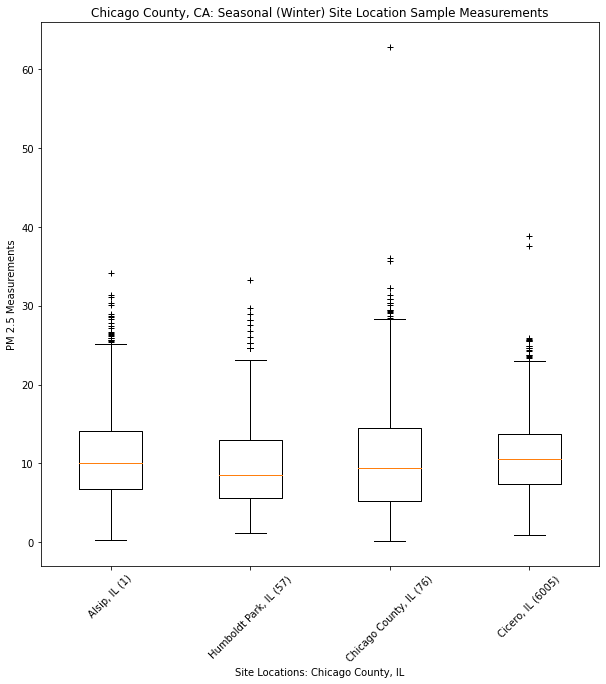

Number of Samples Measured: 5058


<Figure size 432x288 with 0 Axes>

In [90]:
# Generate a box plot of the sample measurement of each site location, annually
measurement_plot_info = [winter_site_1_measurements,winter_site_57_measurements,winter_site_76_measurements,winter_site_6005_measurements]


fig, ax = plt.subplots(figsize=(10, 10))
pos = np.array(range(len(measurement_plot_info))) + 1
bp = ax.boxplot(measurement_plot_info, sym='k+', showfliers=True)

ax.set_xticklabels(headers_list, rotation=45)
ax.set_xlabel('Site Locations: Chicago County, IL')
ax.set_ylabel('PM 2.5 Measurements')
ax.set_title('Chicago County, CA: Seasonal (Winter) Site Location Sample Measurements')
plt.show()
plt.savefig("./Images/IL_winter_pm25_BoxPlot.png")
print(f'Number of Samples Measured: {len(winter_ill_chi)}')

#### Potential Outliers
Filtering by outlier values and dates may tell us which day/month of the year has larger than normal air pollution measurements. 

In [91]:
# Alsip, IL (1) Outliers
alsip_winter_outliers = bp["fliers"][3].get_data()[1]
alsip_winter_outliers.sort(axis=-1, kind='quicksort', order=None)
print(f'Total amount samples in set: {len(winter_site_1_measurements)}')
print(f'Total amount of outliers: {len(alsip_winter_outliers)}')
print(f'Alsip Outlier values: {alsip_winter_outliers}')

Total amount samples in set: 1236
Total amount of outliers: 19
Alsip Outlier values: [23.4 23.5 23.6 23.8 23.8 24.3 24.4 24.6 24.6 24.9 24.9 25.5 25.5 25.6
 25.7 25.8 25.9 37.6 38.9]


In [92]:
# Humboldt Park, IL (57) Outliers
humboldt_winter_outliers = bp["fliers"][2].get_data()[1]
humboldt_winter_outliers.sort(axis=-1, kind='quicksort', order=None)
print(f'Total amount samples in set: {len(winter_site_57_measurements)}')
print(f'Total amount of outliers: {len(humboldt_winter_outliers)}')
print(f'Humboldt Outlier values: {humboldt_winter_outliers}')

Total amount samples in set: 1126
Total amount of outliers: 18
Humboldt Outlier values: [28.5 28.7 29.1 29.2 29.3 29.5 29.5 30.1 30.4 30.4 30.9 30.9 31.4 32.2
 32.3 35.7 36.1 62.8]


In [93]:
# Chicago County, IL (76) Outliers
chi_winter_outliers = bp["fliers"][1].get_data()[1]
chi_winter_outliers.sort(axis=-1, kind='quicksort', order=None)
print(f'Total amount samples in set: {len(winter_site_76_measurements)}')
print(f'Total amount of outliers: {len(chi_winter_outliers)}')
print(f'Chicago Outlier values: {chi_winter_outliers}')

Total amount samples in set: 1358
Total amount of outliers: 18
Chicago Outlier values: [24.6 24.6 24.6 24.6 24.6 24.6 24.6 25.3 25.3 25.3 26.  26.8 27.5 28.2
 28.2 28.9 29.7 33.3]


In [94]:
# Cicero, IL (6005) Outliers
cicero_winter_outliers = bp["fliers"][0].get_data()[1]
cicero_winter_outliers.sort(axis=-1, kind='quicksort', order=None)
print(f'Total amount samples in set: {len(winter_site_6005_measurements)}')
print(f'Total amount of outliers: {len(cicero_winter_outliers)}')
print(f'Cicero Outlier values: {cicero_winter_outliers}')

Total amount samples in set: 1338
Total amount of outliers: 23
Cicero Outlier values: [25.4 25.5 25.6 25.6 25.9 25.9 26.1 26.3 26.4 26.6 26.7 27.2 27.4 27.8
 28.3 28.6 28.7 28.9 30.1 30.4 31.1 31.4 34.1]
